# Random Network AND Scale Free Network With Local Mechanisms
###### This notebook shows the difference in the degree distribution of two networks with the same number of nodes and edges even though both networks are made with random approaches.
###### Barabasi presents a discussion on this topic: http://networksciencebook.com/chapter/5#origins
###### code developed by Rodrigo Henrique Ramos <br> rodrigohenrique.ramos@gmail.com

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import statistics as st
import pandas as pd
import numpy as np

# Plotting Function

In [2]:
def distributionPlotting(distribution, yLabel='', xLabel=''): 
    distribution=sorted(distribution,reverse=True)
    #General information
    info={}
    info['N']=len(distribution)
    info['Mean']= round(np.mean(distribution),2)
    info['Q1']= round(np.percentile(distribution,25),2)
    info['Q2']= round(np.percentile(distribution,50),2)
    info['Q3']= round(np.percentile(distribution,75),2)
    info['Max']= max(distribution)
   
    resume = str(info).replace('{','').replace('}','').replace('\'','').replace(',',' |')

    #========PLOTS====PLOTS=====PLOTS==========

    fig, ax = plt.subplots(2,2,figsize=(15, 15))
    fig.suptitle(str(yLabel)+' Distribution \n'+resume, fontsize=16)

    ####-------------------Linear Scale
    plt.sca(ax[0,0])
    ax[0,0].plot(distribution,'.')
    ax[0,0].set_title('Linear Scale')
    ax[0,0].set_xlabel(xLabel)
    ax[0,0].set_ylabel(yLabel)

    # THE OTHERS PLOTS SHOW THE PROBABILITY OF EACH UNIQUE VALUE IN THE DISTRIBUTION HAPPENS
    #Frequence of each value
    freq={}
    length = len(distribution)
    for v in distribution:
        if(v in freq):
            freq[v]+=1
        else:
            freq[v]=1
            
    #Probability of a 'd' value happens
    pk={}        
    for f in freq:
        pk[f]=freq[f]/length 
    x=list(pk.keys())
    y=list(pk.values())
    
    ####-------------------Probability Linear
    plt.sca(ax[0,1])
    ax[0,1].plot(x,y,'.')
    ax[0,1].set_title('Probability Linear')
    ax[0,1].set_xlabel(xLabel)
    ax[0,1].set_ylabel('P('+yLabel+')')

    ####-------------------Probability LogLog
    plt.sca(ax[0,1])
    ax[1,0].loglog(x,y,'o')
    ax[1,0].set_title('Probability LogLog')
    ax[1,0].set_xlabel(xLabel)
    ax[1,0].set_ylabel('P('+yLabel+')')


    ####------------------Cumulative Probability
    plt.sca(ax[1,1])
    #cumulative degree distribution
    xAxes=[]
    yAxes=[]
    cum=0
    #pk was calculated above
    for k,v in pk.items():
        cum+=v
        xAxes.append(k)
        yAxes.append(cum)
    ax[1,1].loglog(xAxes,yAxes,'o')
    ax[1,1].set_title('Cumulative')
    ax[1,1].set_xlabel(xLabel)
    ax[1,1].set_ylabel('CP('+yLabel+')')

    plt.show()

# Random 
##### This random graph starts with all nodes and randomly places edges 

In [3]:
def randomNetwork(numberOfNodes,numberOfEdges):
    randomG = nx.Graph()
    #Start with all nodes in 
    randomG.add_nodes_from([x for x in range(1,numberOfNodes+1)])

    #Random alocation of edges
    nodes=list(randomG.nodes)
    start = min(nodes)
    end = max(nodes)
    for i in range(0,numberOfEdges):
        node1 = rd.randint(start,end)
        node2 = rd.randint(start,end)
        
        #make sure the 2 nodes are different AND are not in the network
        insert=0
        while insert==0:
            if node1 != node2 and (node1,node2) not in randomG.edges:
                randomG.add_edge(node1,node2,place=i)
                insert=1
            else:
                node1 = rd.randint(start,end)
            node2 = rd.randint(start,end) 
    return randomG

In [4]:
randomG = randomNetwork(2000,29183)         
randomG.name = "Random"
print(nx.info(randomG))

Name: Random
Type: Graph
Number of nodes: 2000
Number of edges: 29183
Average degree:  29.1830


## Plotting: Degree and Clustering


####### Degree


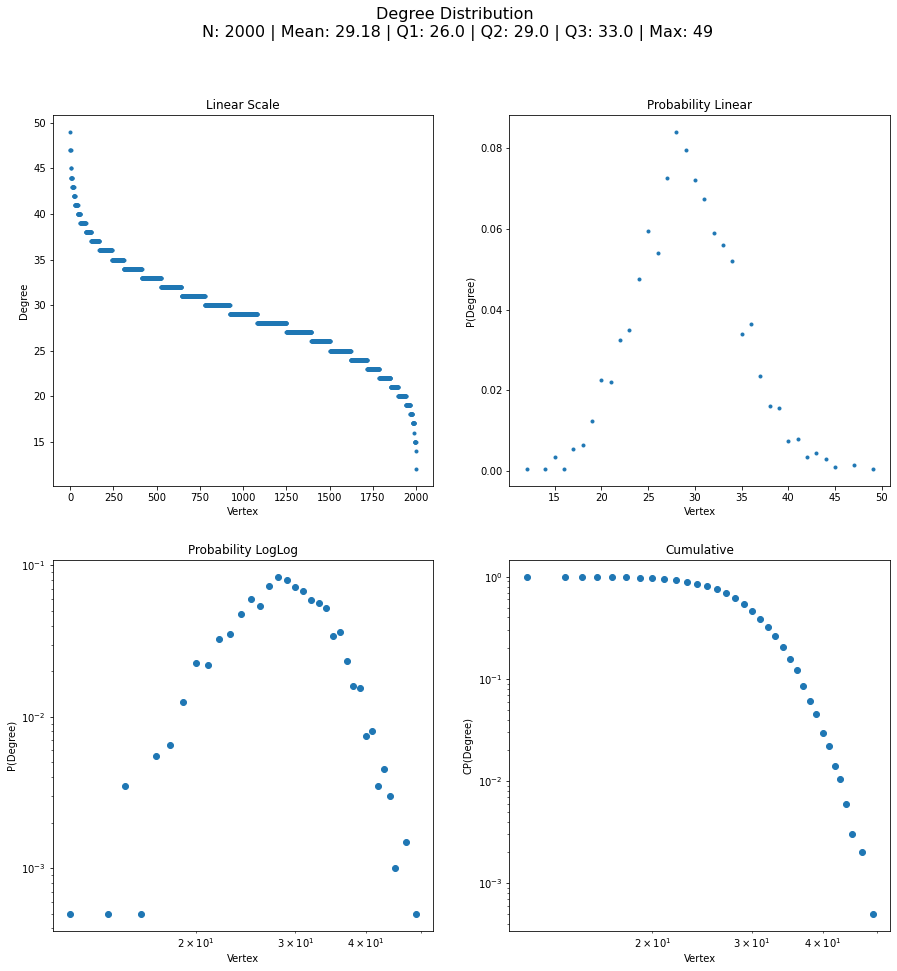

####### Clustering


C:\Users\Ramos\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


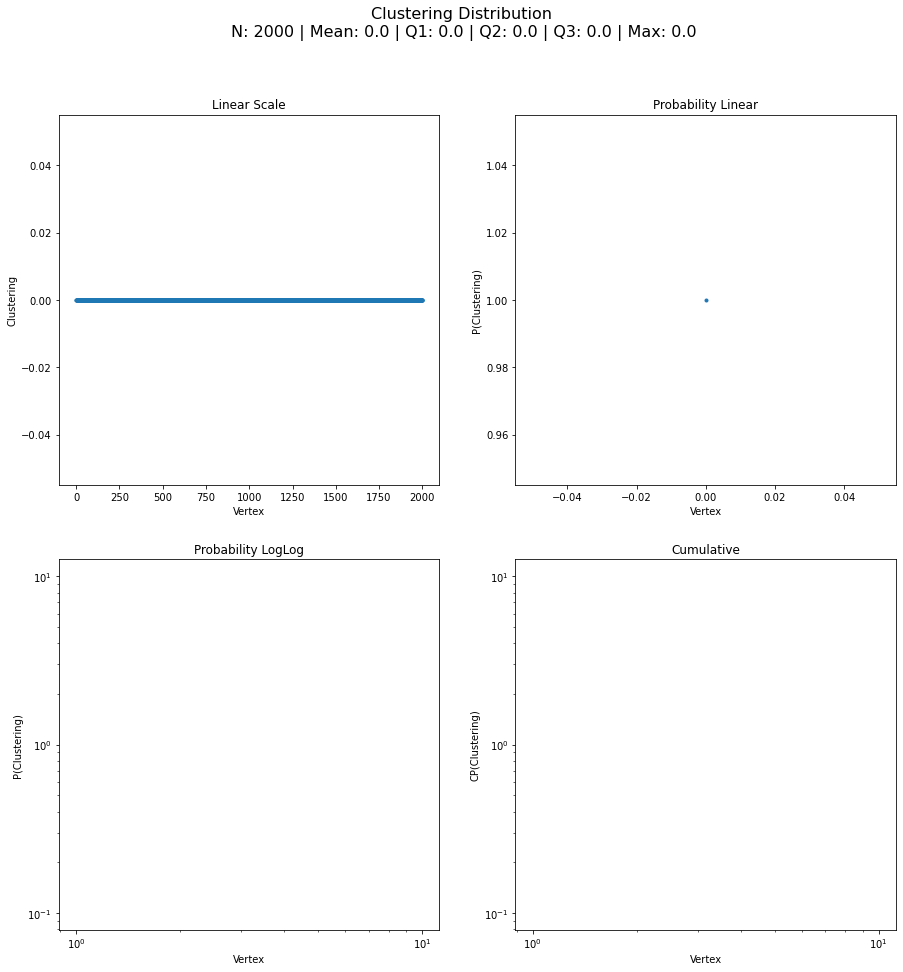

In [5]:
print("####### Degree")
degree=dict(randomG.degree).values()
distributionPlotting(degree,yLabel='Degree',xLabel='Vertex')

print("####### Clustering")
clust = nx.clustering(randomG).values()
#Clustering generate real values between 0 and 1. Here we fit this range in 20 'spaces'
fitRange = 20
fittedDist=[]
for c in clust:
    fittedDist.append(int(c * fitRange)/fitRange)
distributionPlotting(fittedDist,yLabel='Clustering',xLabel='Vertex')

# Scale Free Network With Local Mechanisms
###### Barasi explain how a network can be scale free without (or not) preferential attachment  http://networksciencebook.com/chapter/5#origins
###### Here I implement the "Link Selection Model" that use a random selection of edges: 
Start: With two nodes and one connection
<br>
Growth: At each time step we add a new node to the network.
<br>
Link Selection: We select a link at random and connect the new node to one of the two nodes at the two ends of the selected link.

In [6]:
def linkSelectionModel(numberOfNodes,numberOfEdgesForEachNode):
    scaleFreeRandom = nx.Graph()
    #Start with two nodes connected
    scaleFreeRandom.add_edge(1,2)
    
    #Add new nodes
    for node in range(3,numberOfNodes+1):
        #numberOfEdgesForEachNode must be < than the total number of nodes in the actual state of the network
        edgesAdded=0
        while(edgesAdded < numberOfEdgesForEachNode and edgesAdded < len(scaleFreeRandom.nodes())):    
            #select a random edge
            randPosition = rd.randint(0,len(scaleFreeRandom.edges)-1)
            edge = list(scaleFreeRandom.edges)[randPosition]
            #choose the one of the nodes in the select edge for neighbor
            randNeighbor = rd.randint(0,1)
            scaleFreeRandom.add_edge(node,edge[randNeighbor])
            edgesAdded+=1
    return scaleFreeRandom

In [7]:
linkSelection = linkSelectionModel(2000,15)
linkSelection.name="linkSelectionModel"   
print(nx.info(linkSelection))

Name: linkSelectionModel
Type: Graph
Number of nodes: 2000
Number of edges: 29207
Average degree:  29.2070


## Plotting: Degree and Clustering

####### Degree


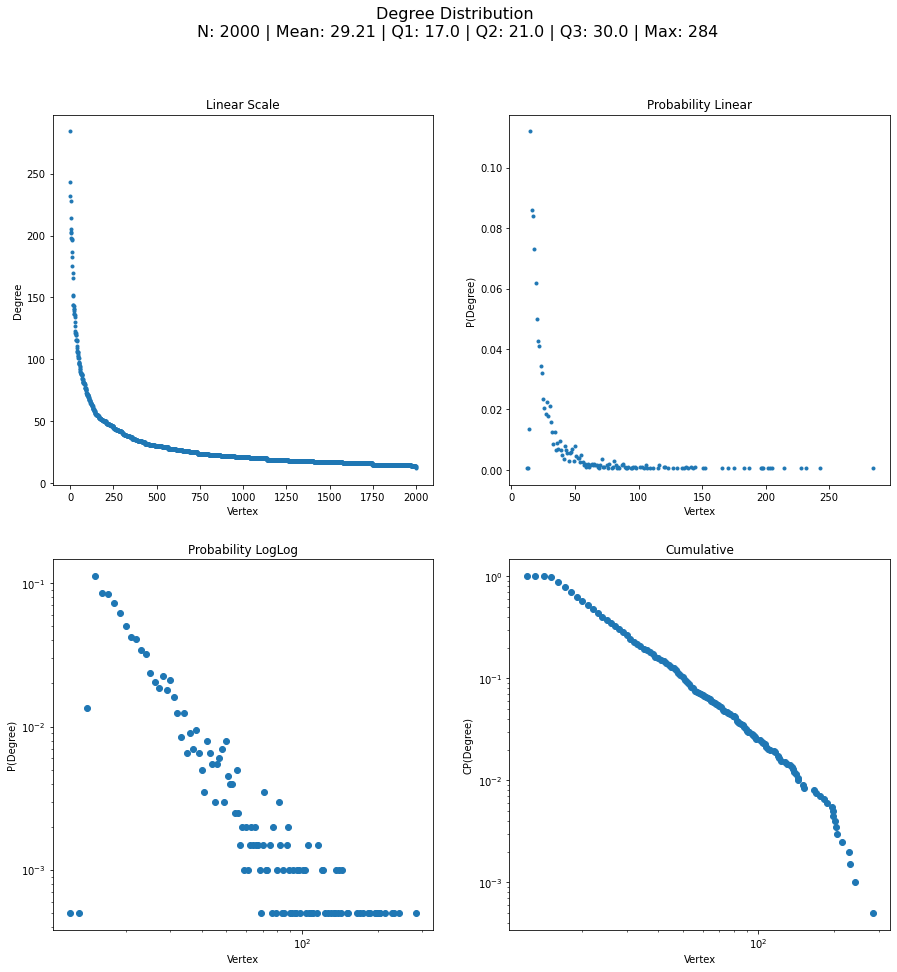

####### Clustering


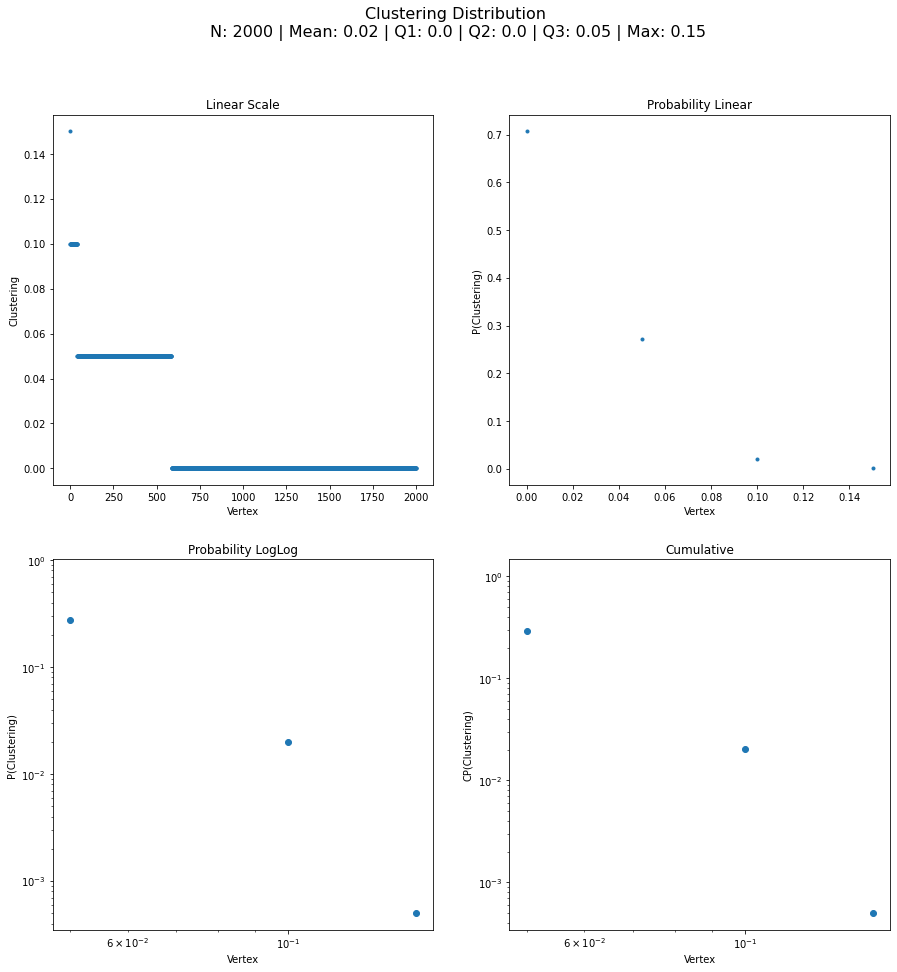

In [8]:
print("####### Degree")
degree=dict(linkSelection.degree).values()
distributionPlotting(degree,yLabel='Degree',xLabel='Vertex')

print("####### Clustering")
clust = nx.clustering(linkSelection).values()
#Clustering generate real values between 0 and 1. Here we fit this range in 20 'spaces'
fitRange = 20
fittedDist=[]
for c in clust:
    fittedDist.append(int(c * fitRange)/fitRange)
distributionPlotting(fittedDist,yLabel='Clustering',xLabel='Vertex')

# Networks Characterization

In [10]:
#We could have use a loop here, both since thera are only two networks...

measures={}
#random
degree = dict(randomG.degree).values()
measures['randomG']={}    
measures['randomG']['minDegree']=min(degree)
measures['randomG']['maxDegree']=max(degree)
measures['randomG']['meanDegree']=st.mean(degree)
measures['randomG']['medianDegree']=st.median(degree)
measures['randomG']['CCs']=len(list(nx.connected_components(randomG)))
LCC = nx.subgraph(randomG,max(nx.connected_components(randomG))) 
measures['randomG']['AvgClusteringLCC']=round(nx.average_clustering(LCC),3)
#This measure takes a lot of time
#measures['randomG']['AvgShortestPathsLCC']=round(nx.average_shortest_path_length(LCC),3)

degree = dict(linkSelection.degree).values()
measures['linkSelection']={}    
measures['linkSelection']['minDegree']=min(degree)
measures['linkSelection']['maxDegree']=max(degree)
measures['linkSelection']['meanDegree']=st.mean(degree)
measures['linkSelection']['medianDegree']=st.median(degree)
measures['linkSelection']['CCs']=len(list(nx.connected_components(linkSelection)))
LCC = nx.subgraph(linkSelection,max(nx.connected_components(linkSelection))) 
measures['linkSelection']['AvgClusteringLCC']=round(nx.average_clustering(LCC),3)
#This measure takes a lot of time
#measures['linkSelection']['AvgShortestPathsLCC']=round(nx.average_shortest_path_length(LCC),3)
    
measures_df = pd.DataFrame.from_dict(measures,orient='index')
measures_df

,minDegree,maxDegree,meanDegree,medianDegree,CCs,AvgClusteringLCC
randomG,12,49,29.183,29.0,1,0.014
linkSelection,12,284,29.207,21.0,1,0.042


# Visual exemple for Link Selection Model with 1 and 2 edges for new nodes

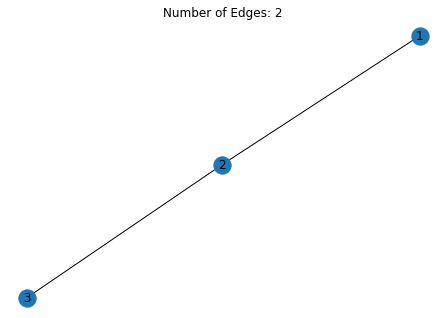

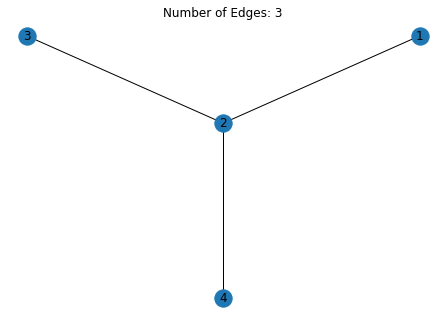

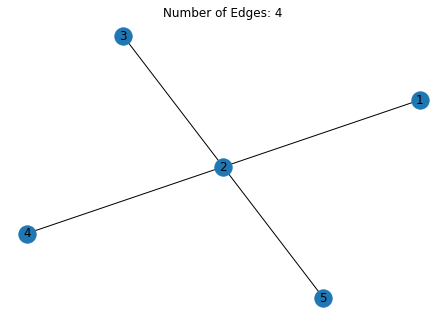

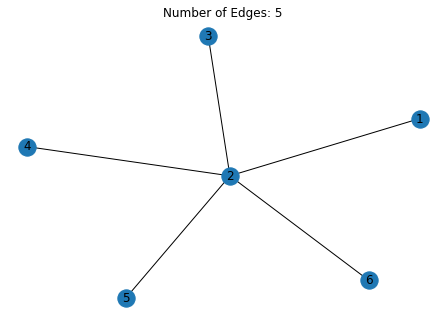

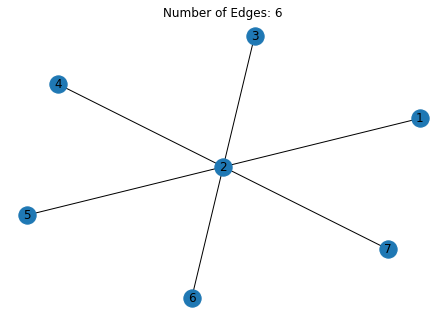

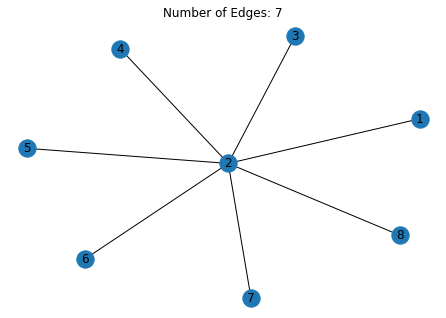

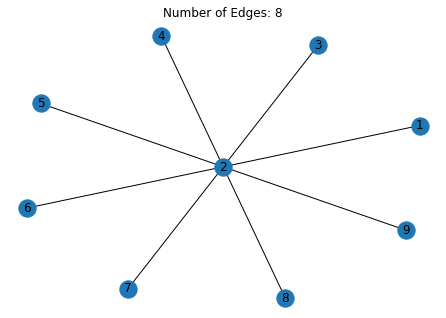

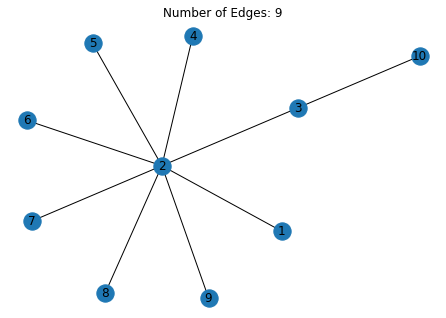

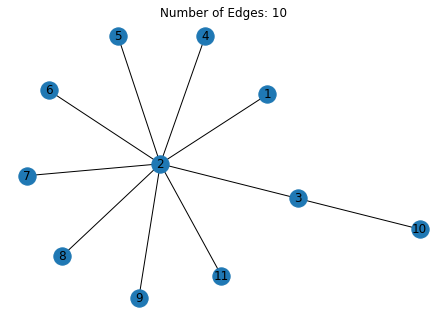

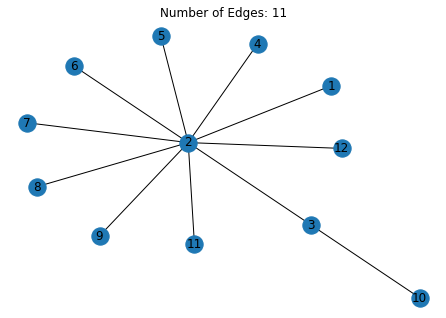

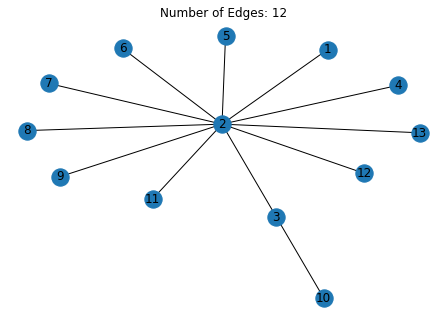

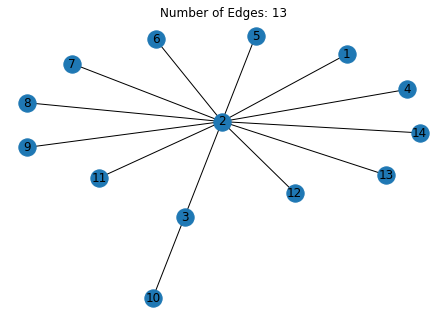

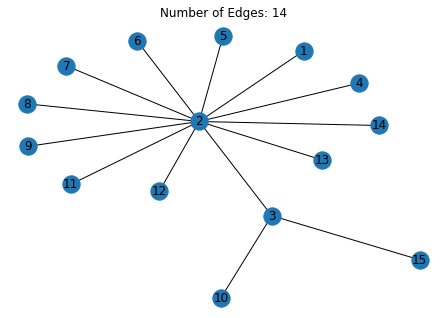

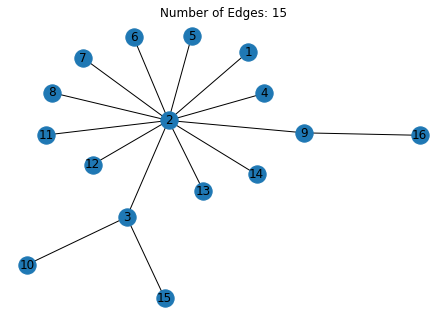

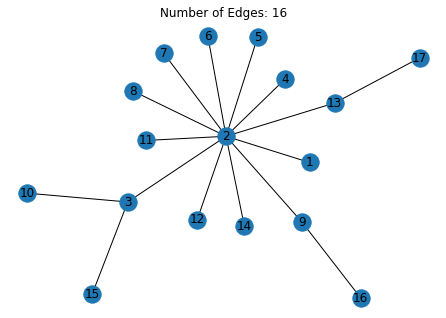

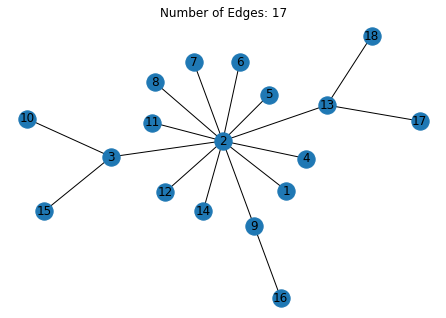

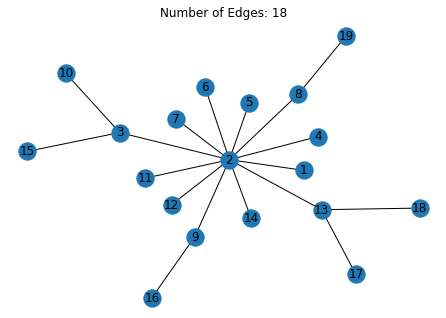

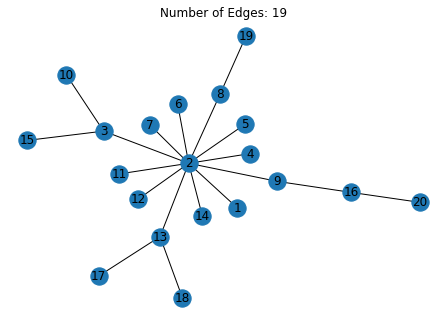

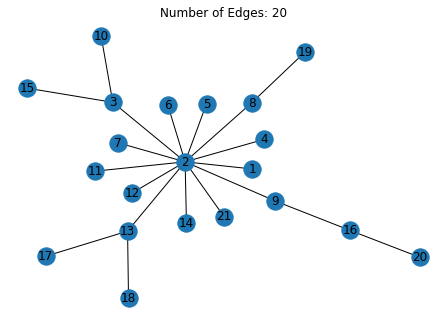

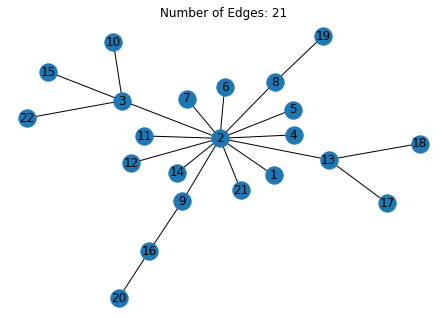

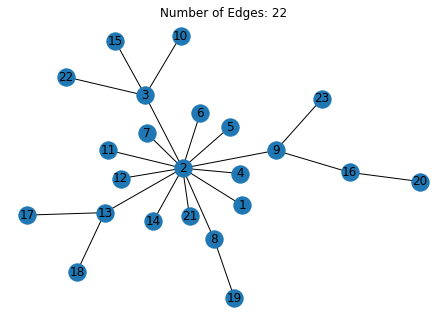

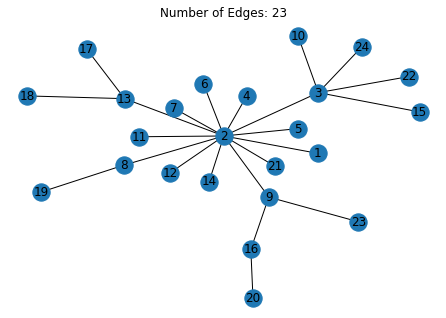

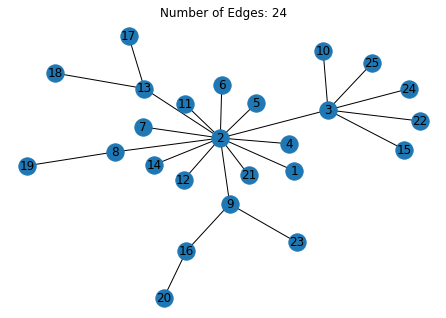

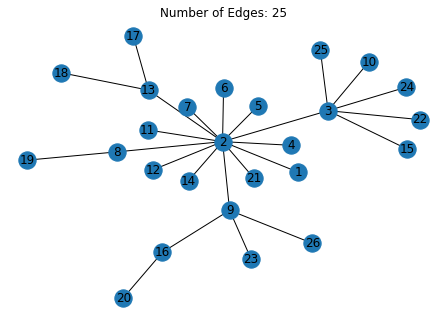

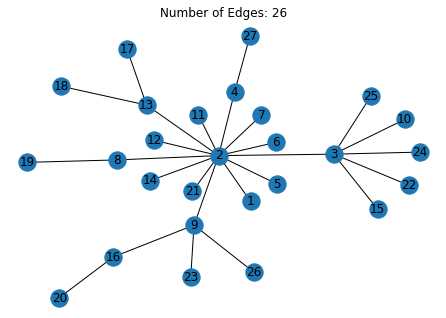

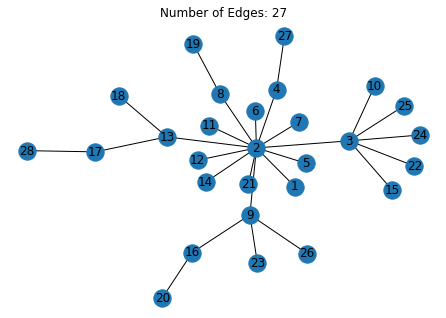

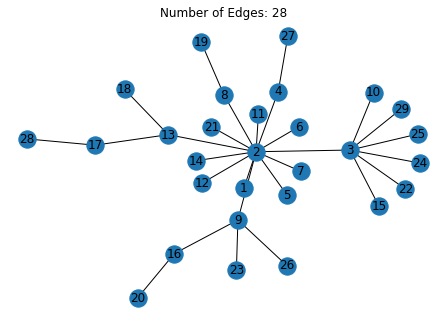

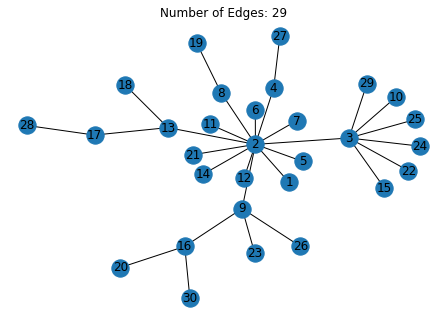

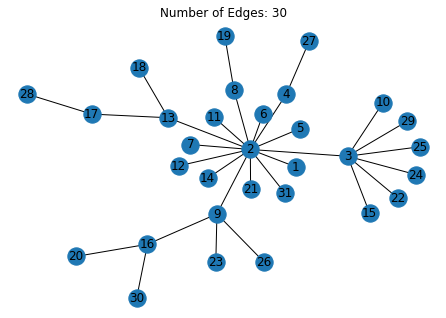

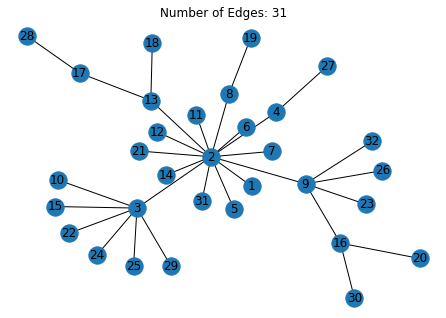

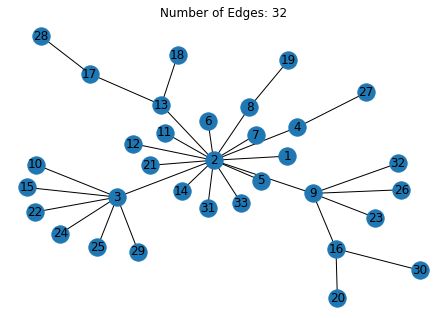

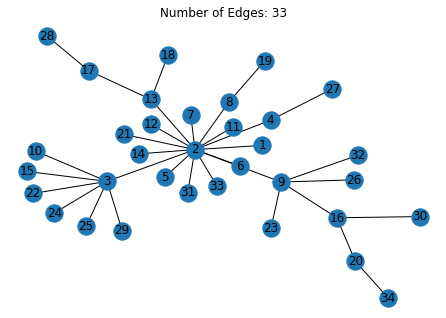

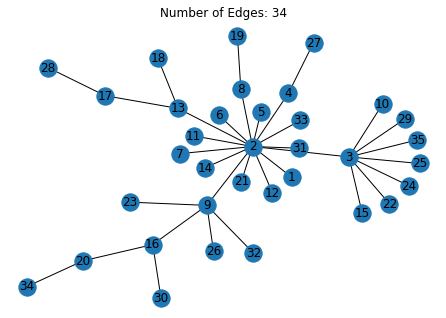

In [11]:
# One Edge at time

scaleFreeRandom = nx.Graph()
scaleFreeRandom.name="scaleFreeRandom"
scaleFreeRandom.add_edge(1,2)

numberOfNodes = 35
numberOfEdgesForEachNode = 1
#Add new nodes
for node in range(3,numberOfNodes+1):
    
    #numberOfEdgesForEachNode must be < than the total number of nodes in the actual state of the network
    edgesAdded=0
    while(edgesAdded < numberOfEdgesForEachNode and edgesAdded < len(scaleFreeRandom.nodes())):    
        #select a random edge
        randPosition = rd.randint(0,len(scaleFreeRandom.edges)-1)
        edge = list(scaleFreeRandom.edges)[randPosition]
        #choose the one of the nodes in the select edge for neighbor
        randNeighbor = rd.randint(0,1)
        scaleFreeRandom.add_edge(node,edge[randNeighbor])
        edgesAdded+=1
        
#   Ploting - useful for small visual examples
    nx.draw_kamada_kawai(scaleFreeRandom,with_labels=1)
    name = "Number of Edges: "+str(len(scaleFreeRandom.edges))
    plt.title(name)
    plt.show()

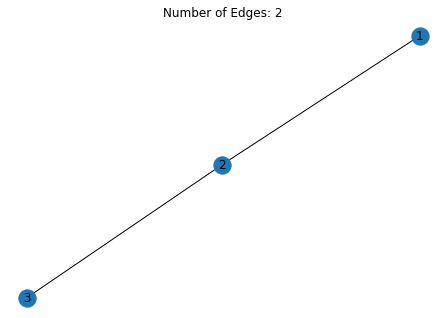

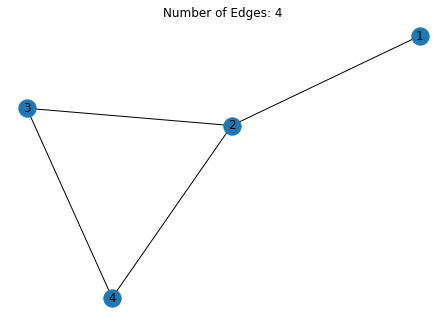

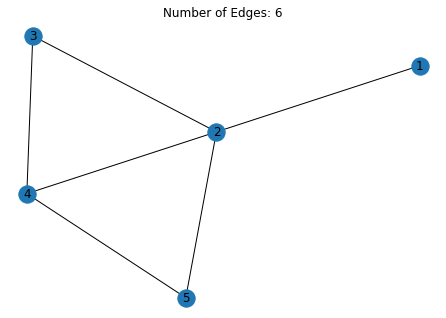

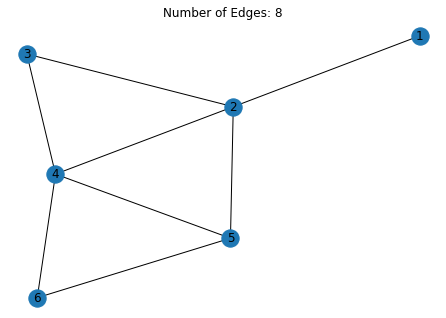

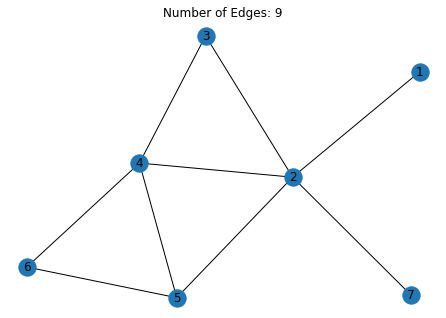

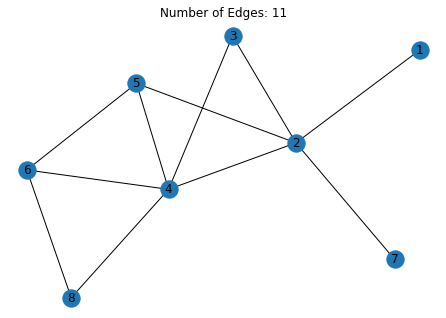

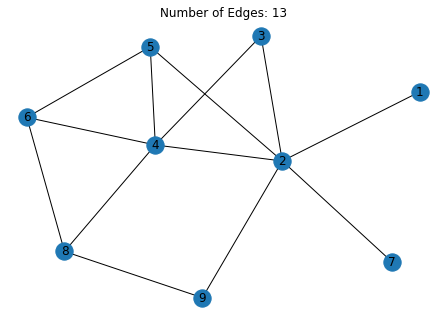

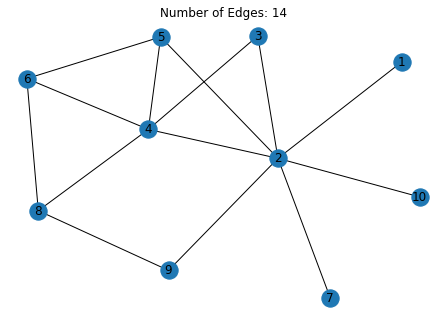

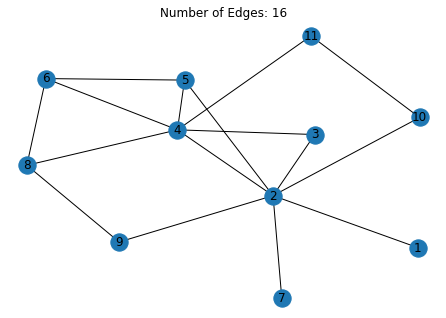

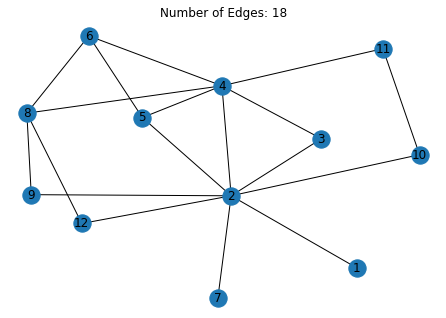

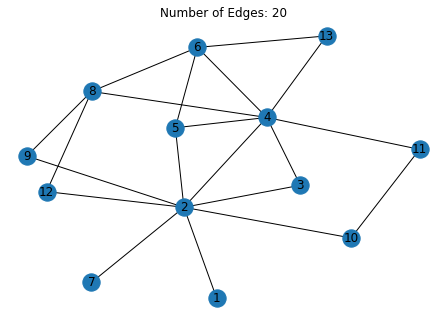

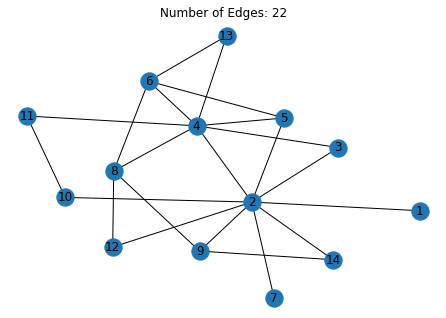

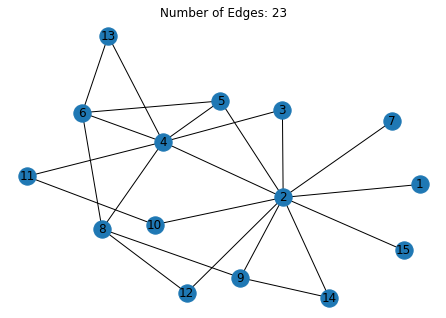

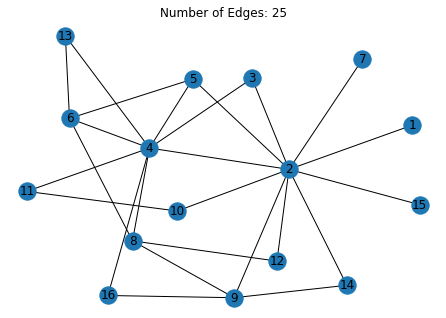

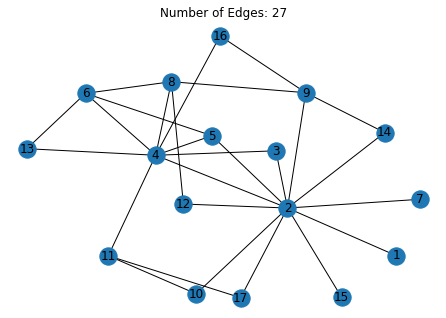

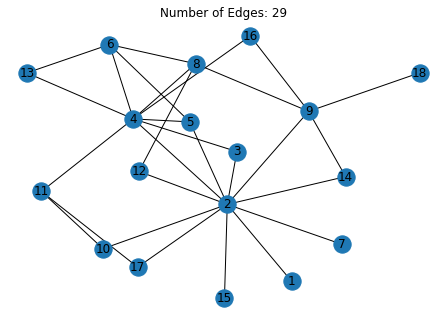

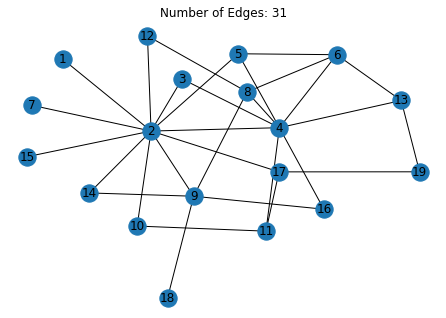

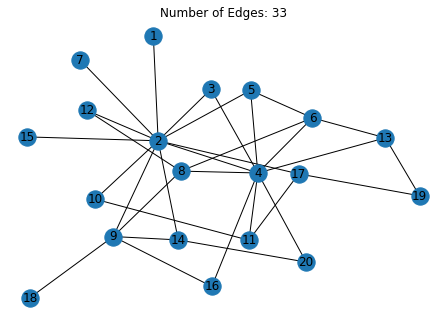

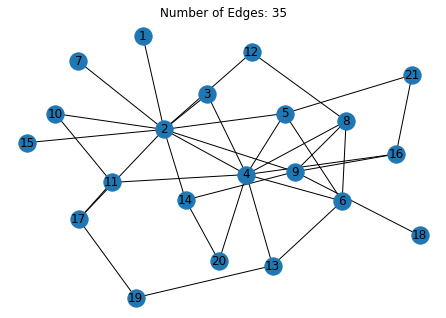

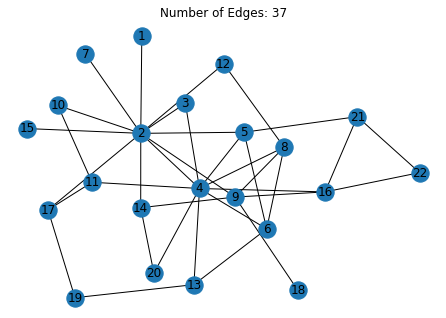

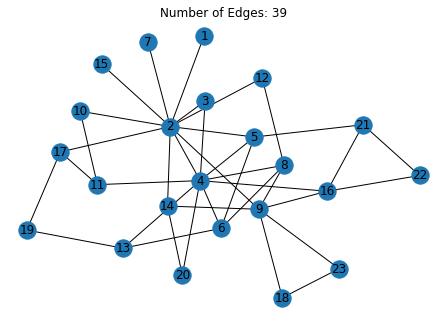

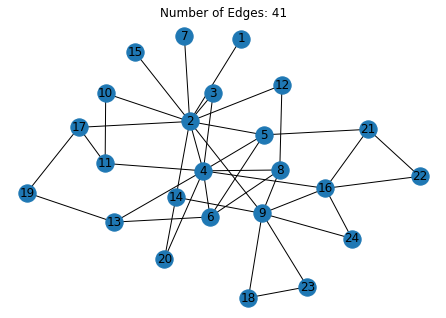

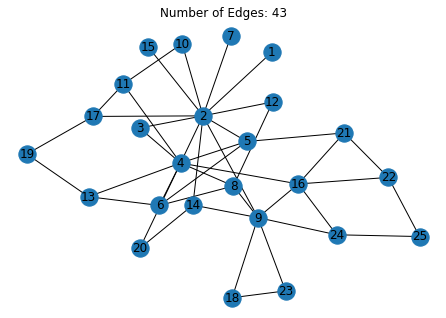

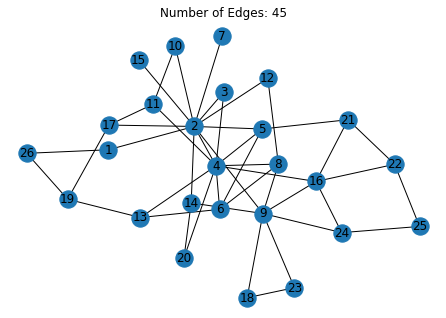

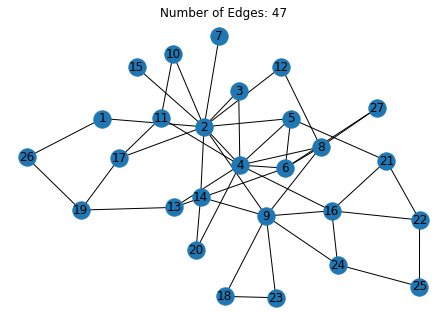

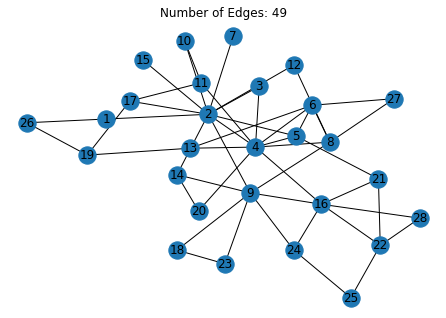

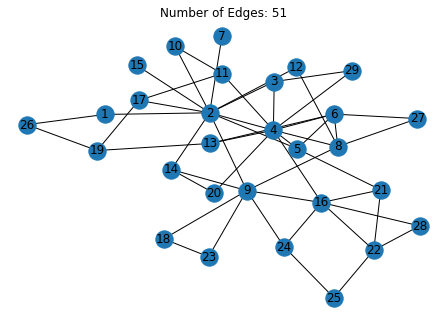

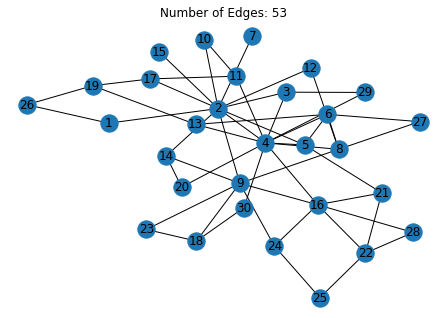

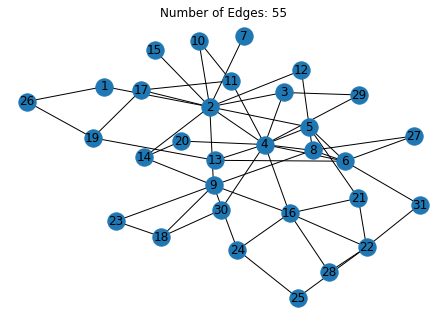

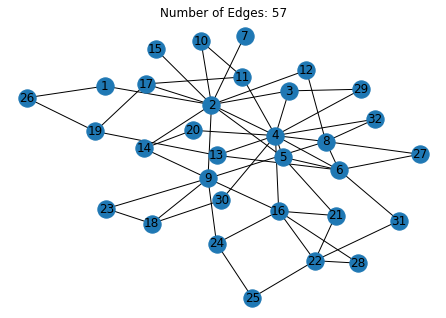

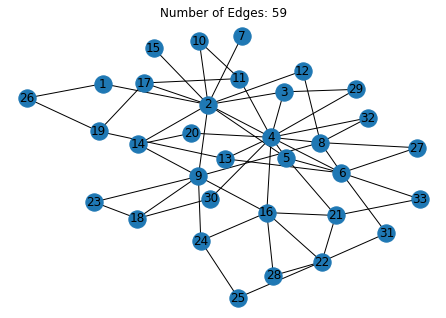

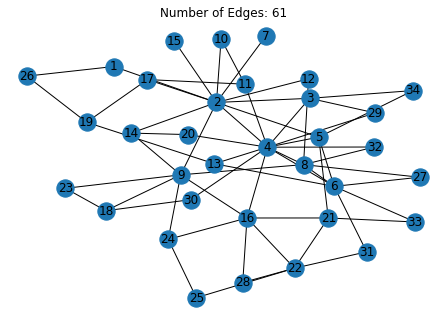

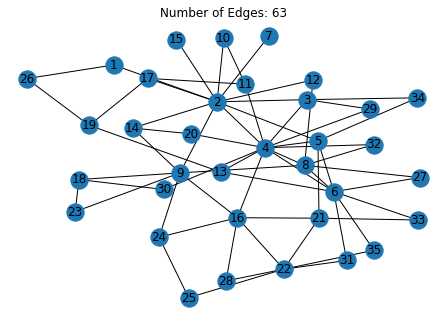

In [12]:
# Two Edge at time

scaleFreeRandom = nx.Graph()
scaleFreeRandom.name="scaleFreeRandom"
scaleFreeRandom.add_edge(1,2)

numberOfNodes = 35
numberOfEdgesForEachNode = 2
#Add new nodes
for node in range(3,numberOfNodes+1):
    
    #numberOfEdgesForEachNode must be < than the total number of nodes in the actual state of the network
    edgesAdded=0
    while(edgesAdded < numberOfEdgesForEachNode and edgesAdded < len(scaleFreeRandom.nodes())):    
        #select a random edge
        randPosition = rd.randint(0,len(scaleFreeRandom.edges)-1)
        edge = list(scaleFreeRandom.edges)[randPosition]
        #choose the one of the nodes in the select edge for neighbor
        randNeighbor = rd.randint(0,1)
        scaleFreeRandom.add_edge(node,edge[randNeighbor])
        edgesAdded+=1
        
#   Ploting - useful for small visual examples
    nx.draw_kamada_kawai(scaleFreeRandom,with_labels=1)
    name = "Number of Edges: "+str(len(scaleFreeRandom.edges))
    plt.title(name)
    plt.show()